In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
#from google.colab import drive

# audio plot 
from scipy.io import wavfile as wav
import IPython.display as ipd

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import Callback,EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense,GlobalAveragePooling2D, Dropout
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import models, layers, optimizers, regularizers

import opendatasets as od

C:\Users\pablo\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
od.download("https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs")
{"username":"dgrone","key":"8e16739c70ce24ea1e6d9a45b61e9796"}

Skipping, found downloaded files in ".\audio-cats-and-dogs" (use force=True to force download)


{'username': 'dgrone', 'key': '8e16739c70ce24ea1e6d9a45b61e9796'}

In [3]:
#drive.mount("/content/drive")
path = './audio-cats-and-dogs/cats_dogs/'
path_train = path+'train'
path_test = path+'test'

In [4]:
from os import listdir

listdir(path_train)

['cat', 'dog']

In [5]:
data_train = list(glob.glob(path_train+'/**/*.wav'))
data_test = list(glob.glob(path_test+'/**/*.wav'))

In [6]:
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], data_train))
file_path = pd.Series(data_train, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
data = pd.concat([file_path, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,File_Path,Labels
0,./audio-cats-and-dogs/cats_dogs/train\dog\dog_...,dog
1,./audio-cats-and-dogs/cats_dogs/train\dog\dog_...,dog
2,./audio-cats-and-dogs/cats_dogs/train\cat\cat_...,cat
3,./audio-cats-and-dogs/cats_dogs/train\dog\dog_...,dog
4,./audio-cats-and-dogs/cats_dogs/train\dog\dog_...,dog


In [7]:
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], data_train))

In [8]:
file_path = pd.Series(data_train, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
data = pd.concat([file_path, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,File_Path,Labels
0,./audio-cats-and-dogs/cats_dogs/train\cat\cat_...,cat
1,./audio-cats-and-dogs/cats_dogs/train\dog\dog_...,dog
2,./audio-cats-and-dogs/cats_dogs/train\cat\cat_...,cat
3,./audio-cats-and-dogs/cats_dogs/train\cat\cat_...,cat
4,./audio-cats-and-dogs/cats_dogs/train\cat\cat_...,cat


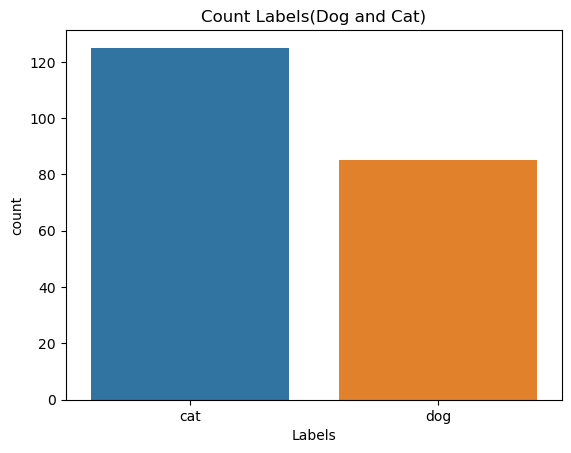

cat    125
dog     85
Name: Labels, dtype: int64

In [9]:
sns.countplot(x='Labels', data=data)
plt.title('Count Labels(Dog and Cat)')
plt.show()
data['Labels'].value_counts()

In [10]:
data.head()

,File_Path,Labels
0,./audio-cats-and-dogs/cats_dogs/train\cat\cat_...,cat
1,./audio-cats-and-dogs/cats_dogs/train\dog\dog_...,dog
2,./audio-cats-and-dogs/cats_dogs/train\cat\cat_...,cat
3,./audio-cats-and-dogs/cats_dogs/train\cat\cat_...,cat
4,./audio-cats-and-dogs/cats_dogs/train\cat\cat_...,cat


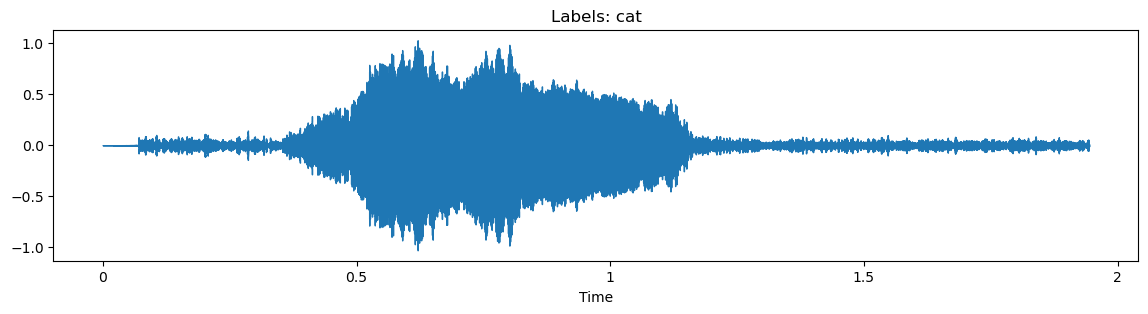

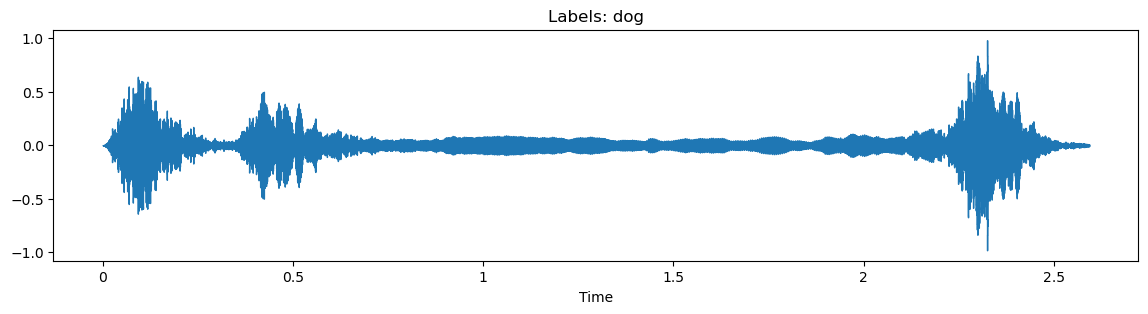

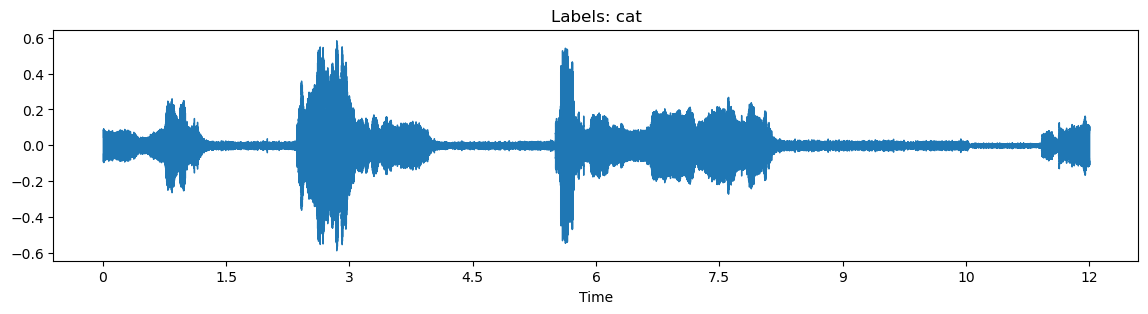

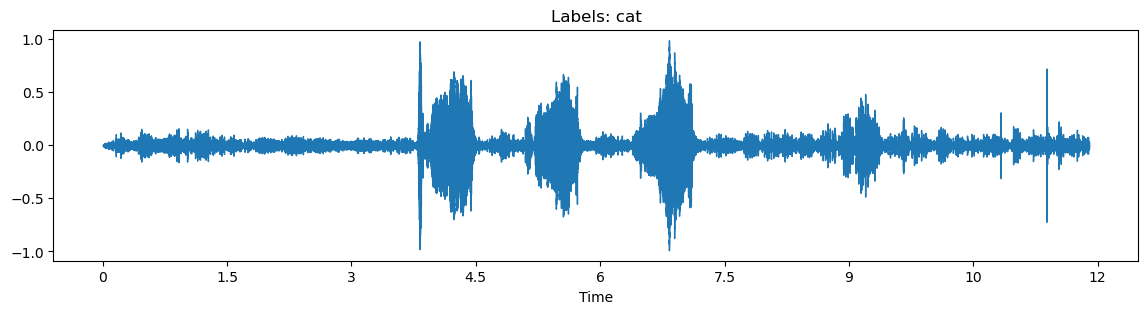

In [11]:
for i in range(4):
    x, sr = librosa.load(data.File_Path[i])
    plt.figure(figsize=(14,3))
    plt.title('Labels: '+str(data['Labels'][i]))
    librosa.display.waveshow(x, sr=sr)

In [12]:
data.File_Path[2]

'./audio-cats-and-dogs/cats_dogs/train\\cat\\cat_103.wav'

In [13]:
ipd.Audio(data.File_Path[1])

Data Processing

In [14]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    return mfccs_processed

In [15]:
import numpy as np
features = []
for index, row in data.iterrows():
    file_name = str(row['File_Path'])
    class_label = row["Labels"]
    data_ = extract_features(file_name)
    features.append([data_, class_label])

In [16]:
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])
featuresdf.head()


,feature,class_label
0,"[-206.61754, 114.40459, -34.895954, 39.46296, ...",cat
1,"[-329.59042, 159.63338, -43.740906, -25.752813...",dog
2,"[-287.04202, 115.03168, -50.06809, 10.091646, ...",cat
3,"[-262.77988, 110.551414, -14.793464, 54.021633...",cat
4,"[-222.62471, 147.55841, -107.41023, -2.9384305...",cat


In [17]:
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())
X.shape, y.shape


((210, 40), (210,))

Encoder

In [18]:
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))

In [60]:
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [68]:
y = y[:, :1]
y

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, y[:], test_size=0.2, random_state = 2022)

ML


In [70]:
model = models.Sequential()
best_test_accuracy = 0

In [71]:
x_train[0]

array([-3.1244223e+02,  1.3060527e+02, -7.5117588e+00,  5.2658319e+00,
       -7.0576686e-01,  8.7229891e+00,  2.2477381e+00, -1.2315722e+01,
       -7.1105117e-01, -1.0634705e+01, -8.8038645e+00,  3.3032453e+00,
        3.4261117e+00,  1.4088292e+01,  1.9153339e+01,  1.1605123e+01,
        4.1839170e+00, -3.5333612e+00,  1.1176885e+00,  8.1144733e+00,
        5.0562034e+00,  4.0884175e+00,  2.7554294e-01,  3.5485377e+00,
        1.0389983e+01,  5.1185303e+00,  6.5578537e+00,  1.1210886e+01,
        9.1476221e+00,  4.0617590e+00, -3.2383895e+00, -7.0106512e-01,
        4.2987275e+00, -7.8062302e-01, -2.1740978e+00, -4.2384472e-01,
       -2.7460208e+00,  9.9832517e-01,  6.9828091e+00,  8.4773769e+00],
      dtype=float32)

In [72]:
x_train.shape

(168, 40)

In [73]:
y_train

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],

In [74]:
y_train.shape

(168, 1)

In [75]:
input_shape = 40

model = models.Sequential()

# Capa 1
model.add(Dense(20, kernel_initializer = 'uniform', activation='relu', input_dim=input_shape))
# Capa 2
model.add(Dense(20, kernel_initializer = 'uniform', activation='relu'))
# Capa de Salida
model.add(Dense(1, kernel_initializer = 'uniform', activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])


Epoch 1/20
11/11 [==============================] - 1s 3ms/step - loss: 0.4892 - accuracy: 0.7738
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8631
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.9167
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9107
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2543 - accuracy: 0.8690
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2644 - accuracy: 0.8750
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2931 - accuracy: 0.8988
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.8929
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9107
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9167
Epoch 11/20
11/11 [

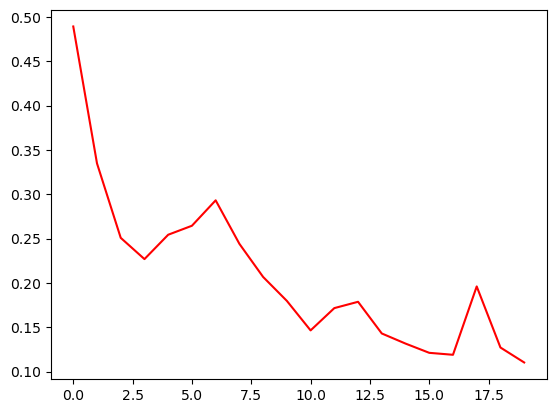

In [76]:

# train the parameters
history = model.fit(x_train, y_train, epochs=20, batch_size=16)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=16)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [104]:
import tensorflow as tf

batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 40

units = 64
output_size = 1  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    if allow_cudnn_kernel:
        lstm_layer = tf.keras.layers.LSTM(32, input_dim=input_dim)
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = tf.keras.layers.RNN(
            tf.keras.layers.LSTMCell(32), input_dim= input_dim)
    model = tf.keras.models.Sequential()
    model = tf.keras.models.Sequential(
        [
            lstm_layer,
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(output_size),
        ]
    )
    return model

modelLSTM = build_model(allow_cudnn_kernel=True)

modelLSTM.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])


In [101]:
y_test.shape

(42, 1)

In [94]:
epochs=20 
# train the parameters
history = modelLSTM.fit( x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=epochs)

Epoch 1/20


ValueError: in user code:

    File "C:\Users\pablo\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\pablo\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\pablo\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\pablo\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\pablo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\pablo\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_30' (type Sequential).
    
    Input 0 of layer "lstm_6" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 40)
    
    Call arguments received by layer 'sequential_30' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 40), dtype=float32)
      • training=True
      • mask=None


In [91]:


# evaluate accuracy
train_acc = modelLSTM.evaluate(X, y, batch_size=16)[1]
test_acc = modelLSTM.evaluate(X, y, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

Epoch 1/20


ValueError: in user code:

    File "C:\Users\pablo\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\pablo\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\pablo\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\pablo\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\pablo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\pablo\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_30' (type Sequential).
    
    Input 0 of layer "lstm_6" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 40)
    
    Call arguments received by layer 'sequential_30' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 40), dtype=float32)
      • training=True
      • mask=None
